In [137]:
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
from scipy import stats
from pandas import DataFrame
pd.options.display.max_columns = 150
%matplotlib inline

In [138]:
school_data = pd.read_excel("elsec15.xls")

In [139]:
school_data.head()

,STATE,IDCENSUS,NAME,CONUM,CSA,CBSA,SCHLEV,NCESID,YRDATA,V33,TOTALREV,TFEDREV,C14,C15,C16,C17,C19,B11,C20,C25,C36,B10,B12,B13,TSTREV,C01,C04,C05,C06,C07,C08,C09,C10,C11,C12,C13,C24,C35,C38,C39,TLOCREV,T02,T06,T09,T15,T40,T99,D11,D23,A07,A08,A09,A11,A13,A15,A20,A40,U11,U22,U30,U50,U97,TOTALEXP,TCURELSC,TCURINST,E13,J13,J12,J14,V91,V92,TCURSSVC,E17,E07,E08,E09,V40,V45,V90,V85,J17,J07,J08,J09,J40,J45,J90,J11,J96,TCUROTH,E11,V60,V65,J10,J97,NONELSEC,V70,V75,V80,J98,TCAPOUT,F12,G15,K09,K10,K11,J99,L12,M12,Q11,I86,Z32,Z33,V11,V13,V15,V17,V21,V23,V37,V29,Z34,V10,V12,V14,V16,V18,V22,V24,V38,V30,V32,_19H,_21F,_31F,_41F,_61V,_66V,W01,W31,W61
0,1,1500100100000,AUTAUGA COUNTY SCHOOL DISTRICT,1001,N,33860,3,0100240,15,9664,79665,7574,1791,2179,259,202,106,19,13,2846,0,109,0,50,53244,44326,27,0,622,9,0,0,0,2273,4984,1003,0,0,0,0,18847,0,6614,0,0,0,20,0,5910,2,0,1792,0,1532,0,393,77,300,74,7,1381,745,76069,72872,44085,44085,0,0,0,0,0,23217,3853,2122,1434,4376,5666,4914,852,0,0,0,0,0,0,0,0,0,0,5570,5570,0,0,0,0,1010,373,0,637,0,691,529,0,0,162,0,0,0,0,167,1329,42440,28822,2487,1335,622,3019,1394,2393,354,1730,17720,11207,933,517,202,1192,705,1672,122,1126,0,49431,16603,2992,63042,0,0,2094,372,8617
1,1,1500200100000,BALDWIN COUNTY SCHOOL DISTRICT,1003,380,19300,3,0100270,15,30596,330317,23602,5729,7207,811,882,350,190,187,7953,0,0,0,293,143282,120995,27,0,1810,63,0,0,0,5385,10364,4638,0,0,0,0,163433,0,45464,0,0,0,342,29,89782,0,0,3694,0,5539,0,2758,1640,2531,202,201,3904,7347,297083,269928,155668,155668,0,0,0,24,0,99682,17436,11127,4041,17903,30248,11857,7070,0,0,0,0,0,0,0,0,0,0,14578,14578,0,0,0,0,4957,2481,15,2461,0,13256,8737,21,481,4017,0,0,0,0,268,8674,153812,101788,10963,7133,1578,12629,7159,6003,1977,4318,60668,38135,3948,2530,481,4831,3787,3219,744,2924,0,337160,99087,13027,423220,0,0,5784,50441,71370
2,1,1500300100000,BARBOUR COUNTY SCHOOL DISTRICT,1005,N,N,3,0100300,15,925,10519,2518,1279,323,153,1,37,0,20,705,0,0,0,0,5632,4067,27,0,142,4,0,0,0,164,812,416,0,0,0,0,2369,0,1301,0,0,0,6,0,561,0,0,46,0,148,0,26,11,1,4,0,50,215,10314,9957,5249,5249,0,0,0,0,0,3835,459,360,610,688,695,869,154,0,0,0,0,0,0,0,0,0,0,873,873,0,0,0,0,145,34,0,111,0,0,0,0,0,0,0,0,0,0,34,178,5317,3206,284,168,387,482,115,375,57,225,2100,1222,102,60,118,177,68,196,20,134,0,8024,0,304,7720,0,0,0,0,646
3,1,1500300200000,EUFAULA CITY SCHOOL DISTRICT,1005,N,N,3,0101410,15,2829,26076,3374,1035,596,139,1,42,15,150,1312,0,23,0,61,16048,13546,27,0,279,6,0,0,0,718,459,1013,0,0,0,0,6654,0,2807,0,0,0,7,0,2168,60,0,313,0,577,0,140,0,173,27,3,147,232,25602,24232,14887,14887,0,0,0,0,0,7494,1165,656,1076,1708,1666,589,634,0,0,0,0,0,0,0,0,0,0,1851,1851,0,0,0,0,333,114,0,219,0,990,777,0,32,181,0,0,0,0,47,0,13627,9247,713,324,621,1201,319,244,364,499,5667,3768,268,136,188,436,190,176,141,346,0,0,0,0,0,0,0,0,2054,7478
4,1,1500400100000,BIBB COUNTY SCHOOL DISTRICT,1007,142,13820,3,0100360,15,3357,31825,3586,856,980,220,166,51,0,59,1254,0,0,0,0,21687,18070,27,0,306,1,0,0,0,929,1965,389,0,0,0,0,6552,0,1472,0,0,0,9,0,2415,0,0,537,0,1080,0,97,3,249,29,2,55,604,31293,29133,16019,16019,0,0,0,182,0,10822,1822,1362,1068,1934,2137,1863,636,0,0,0,0,0,0,0,0,0,0,2292,2292,0,0,0,0,658,255,8,395,0,858,199,132,35,492,0,0,0,0,31,613,16925,10820,764,873,522,1355,398,930,287,793,7005,4207,317,298,153,535,223,653,119,474,0,22155,0,1190,20965,0,0,1397,790,5400


In [140]:
high_school_data = school_data[school_data.STATE == 5]
high_school_data = high_school_data[np.logical_or(school_data.SCHLEV == 2, school_data.SCHLEV == 3)]
high_school_data.sort_values('NAME', inplace = True)
replace_term = r' SCH.*'
high_school_data.NAME = high_school_data.NAME.str.replace(replace_term, "")

/usr/local/lib/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


In [141]:
small_high_school_data = high_school_data.loc[:, ["NAME", "SCHLEV", "V33", "TOTALEXP", "IDCENSUS", "T06"]]

In [142]:
cal_sat = pd.read_csv("sat16.csv")

In [143]:
cal_sat.dropna(inplace = True)
cal_sat.dname = cal_sat.dname.str.upper()
cal_sat['SATSCORE'] = cal_sat.AvgScrMath + cal_sat.AvgScrWrit + cal_sat.AvgScrRead

In [144]:
small_cal_sat = cal_sat.loc[:, ['dname', 'SATSCORE']]
small_cal_sat = small_cal_sat.groupby("dname").mean()
small_cal_sat.reset_index(inplace = True)
small_cal_sat.head()

,dname,SATSCORE
0,ABC UNIFIED,1584.75
1,ACALANES UNION HIGH,1779.00
2,ACTON-AGUA DULCE UNIFIED,1568.00
3,ALAMEDA COUNTY OFFICE OF EDUCATION,1153.00
4,ALAMEDA UNIFIED,1507.75


In [145]:
merged_data = small_high_school_data.merge(small_cal_sat, how = 'inner', left_on='NAME', right_on = 'dname').drop('dname', 1)

In [146]:
merged_data["PERPUPILEXP"] = merged_data.TOTALEXP / merged_data.V33
merged_data["PERPUPILTAX"] = merged_data.T06 / merged_data.V33
merged_data["CONSTANT"] = [1] * len(merged_data)
merged_data.head()

,NAME,SCHLEV,V33,TOTALEXP,IDCENSUS,T06,SATSCORE,PERPUPILEXP,PERPUPILTAX,CONSTANT
0,ACALANES UNION HIGH,2,5402,78537,5500700100000,46740,1779.000000,14.538504,8.652351,1
1,ACTON-AGUA DULCE UNIFIED,3,4043,29788,5501909400000,4172,1568.000000,7.367796,1.031907,1
2,ALAMEDA UNIFIED,3,11020,104779,5500100100000,27905,1507.750000,9.508076,2.532214,1
3,ALBANY CITY UNIFIED,3,3881,68063,5500100200000,10651,1767.000000,17.537490,2.744396,1
4,ALHAMBRA UNIFIED,3,17617,261694,5501900200000,31187,1546.666667,14.854629,1.770279,1


/usr/local/lib/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


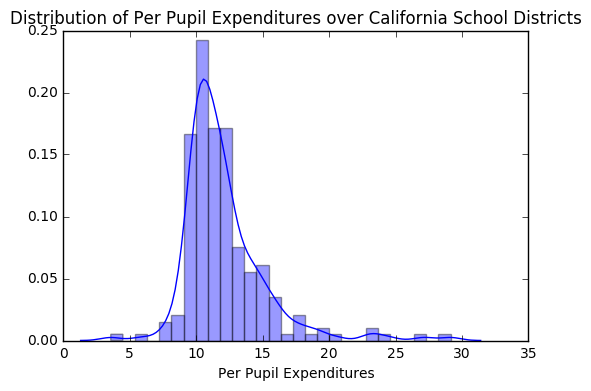

In [147]:
sns.distplot(merged_data['PERPUPILEXP']).set_title("Distribution of Per Pupil Expenditures over California School Districts")
plt.xlabel('Per Pupil Expenditures')
plt.show()

Looking at linear relationships between per pupil expenditure, number of students, property tax, (x) and SAT score(y).

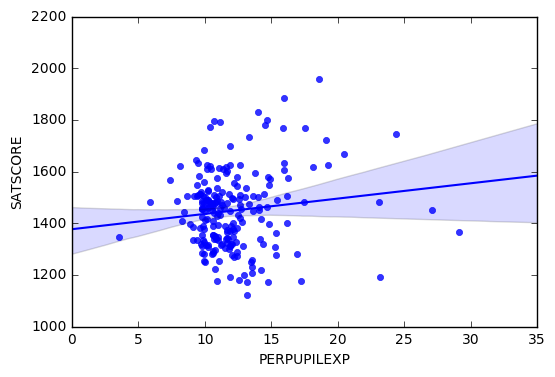

In [148]:
sns.regplot(x="PERPUPILEXP", y="SATSCORE", data = merged_data)
plt.show()
#not much corrilation is seen here and we do not seem to have good regression

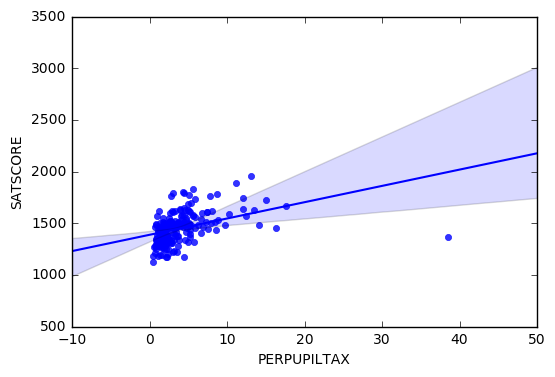

In [149]:
sns.regplot(x="PERPUPILTAX", y="SATSCORE", data = merged_data)
#not much corrilation is seen here and we do not seem to have good regression however
#it is better than previous
plt.show()

/usr/local/lib/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


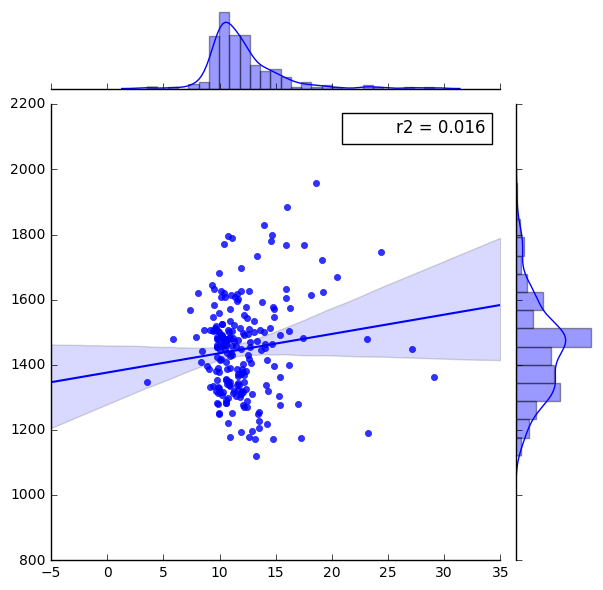

In [150]:
X1 = merged_data.loc[:, ['PERPUPILEXP']].as_matrix()
X2 = merged_data.loc[:, ['PERPUPILTAX']].as_matrix()
y = merged_data.loc[:, ['SATSCORE']].as_matrix()
def r2(x, y):
    return stats.pearsonr(x, y)[0]**2

sns.jointplot(X1, y, kind="reg", stat_func=r2)
plt.show()

/usr/local/lib/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


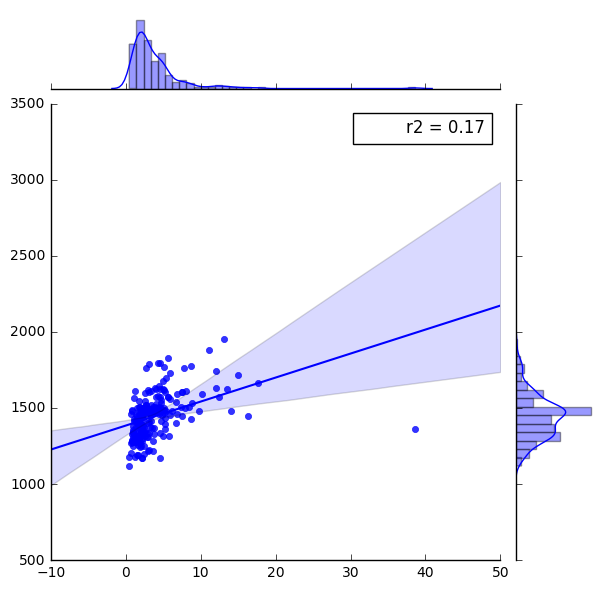

In [151]:
ax = sns.jointplot(X2, y, kind="reg", stat_func=r2)
plt.show('ax')

In [152]:
X = merged_data.loc[:, ['PERPUPILEXP', 'PERPUPILTAX', 'V33', "CONSTANT"]].as_matrix()

In [153]:
lin_model = LinearRegression()

In [154]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

In [155]:
lin_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [156]:
# the fit of the model on untrained data is poor, indicating the data is not linear
lin_model.score(X_test, y_test)

-0.6053698593431649

In [157]:
lin_model.coef_

array([[ -1.57021922e+01,   3.82127160e+01,   1.22965641e-03,
          0.00000000e+00]])

In [158]:
cleaner_data = np.array([[2,"Secondary School System Only"], 
                         [3,"Elementary-Secondary School System"]])
sub = pd.DataFrame(data = cleaner_data, columns = ['SCHLEV', 'name'])
merged_data['SCHLEV_TWO'] = merged_data['SCHLEV'].replace({2: "Secondary School System Only", 3: "Elementary-Secondary School System" })
merged_data['ALL'] = ""

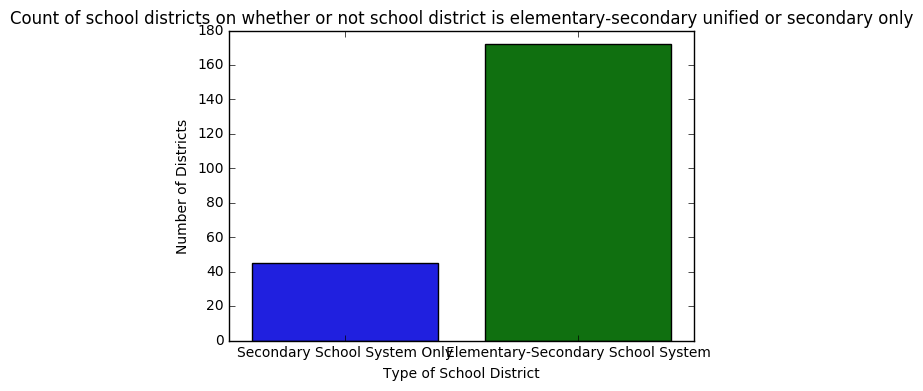

In [159]:
sns.countplot(x = 'SCHLEV_TWO', data = merged_data).set_title("Count of school districts on whether or not school district is elementary-secondary unified or secondary only")
plt.xlabel("Type of School District")
plt.ylabel("Number of Districts")
plt.show()

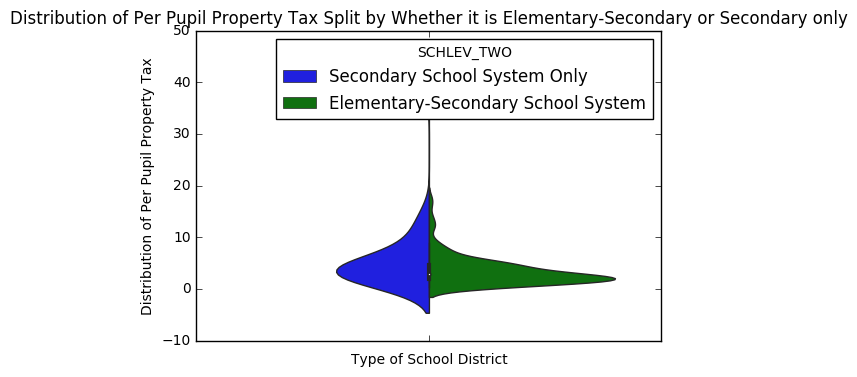

In [160]:
sns.violinplot(x = 'ALL', y = 'PERPUPILTAX', hue = 'SCHLEV_TWO', split = True, data = merged_data).set_title("Distribution of Per Pupil Property Tax Split by Whether it is Elementary-Secondary or Secondary only")
plt.xlabel("Type of School District")
plt.ylabel("Distribution of Per Pupil Property Tax")
plt.show()

In [161]:
SCHLEV_data = merged_data[merged_data.SCHLEV.isin([2, 3])]
SCHLEV_data['HASELEMENTARY'] = SCHLEV_data.SCHLEV == 3

In [162]:
X = SCHLEV_data.loc[:, ['PERPUPILEXP', 'PERPUPILTAX', 'V33', 'CONSTANT']].as_matrix()
y = SCHLEV_data.loc[:, ['HASELEMENTARY']].as_matrix()

In [163]:
log_model = LogisticRegression()

In [164]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

In [165]:
log_model.fit(X_train, y_train)

/usr/local/lib/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [166]:
log_model.score(X_test, y_test)

0.78787878787878785

In [167]:
log_model.coef_

array([[  7.40140960e-02,  -1.61298031e-01,   9.00970133e-05,
          1.68966468e-01]])